# Moving Average of Data

This code does a moving average that looks forward and backward in time to include n samples on either side

In [7]:
# gets all of numpy but you will still need to refer to e.g. numpy.random.randn() as random.randn()
from numpy import *               # all of the array capable elements for numerical data          
from scipy.stats import norm      # comprehensive functions for Gaussian normal distributions
import csv                        # library for reading and writing comma separated value files
from matplotlib.pyplot import *   # all of pyplot to graph the results of our calculations

# put figures inline in the notebook, so you don't have to call show()
%matplotlib inline

# This lets you make the default figure size larger (or smaller)
from IPython.core.pylabtools import figsize
figsize(14, 7)

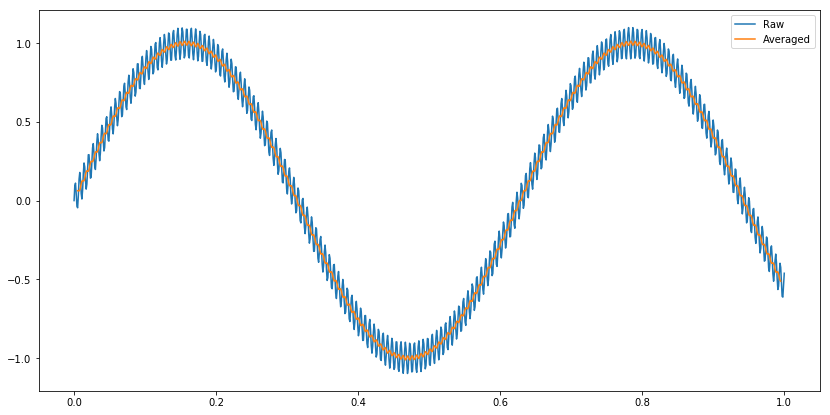

In [8]:
t = linspace(0,1,1000)  # time of measurement
# Simulate a low frequency signal with added high frequency noise 
T = sin(10*t) + sin(1000*t)/10
n = 5
Tma = T.copy()
# We can only do a moving average when there are enough values before and after
for i in range(n,len(Tma)-n): Tma[i] = np.mean(T[i-n:i+n+1])
plot(t,T,label = 'Raw')
plot(t[n:len(Tma)-n],Tma[n:len(Tma)-n],label = 'Averaged')
legend()

This function is a little more general, allowing separate specification of how many samples to include from behind and ahead of the current sample. It also does it's best to average the data in the tails

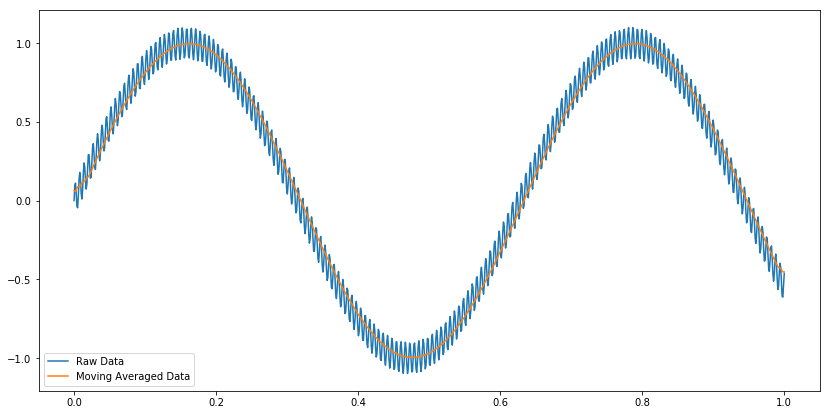

In [14]:
def movingAverage(T,backward = 0,forward = 0):
    # return a moving averaged version of T that includes 
    # up to backward samples from before the current point
    # and up to forward samples from after the current point
    # Tails of the sample will be averaged using fewer points.
    Tma = T.copy()                   # a copy to store the averaged values in
    for i in range(0,len(T)): 
        s = max(i-backward,0)        # start at 0 or backward
        f = min(i+forward+1,len(T))  # finish at forward or end of data
        Tma[i] = np.mean(T[s:f])
    return Tma

Tma = movingAverage(T,20,10)

plot(t,T,label = 'Raw Data')
plot(t,Tma,label = 'Moving Averaged Data')
legend()